In [5]:
import os, sys
os.chdir(os.path.dirname(sys.prefix))
# print(f"Рабочая директория: {os.getcwd()}")

In [6]:
from src.tsp_dewarp.transforms import (
    RandomNoiseTransform, RandomPerspectiveTransform,
    RandomWaveTransform, RandomSpineBend, 
    Compose
)
from src.tsp_dewarp.dataset import TPSDatasetGenerator, TPSDataset

In [ ]:
compose = Compose([
    RandomPerspectiveTransform(),
    RandomSpineBend(), 
    RandomWaveTransform(), 
    # RandomNoiseTransform(), # ПРИМЕНЯТЬ К TPS, А НЕ К ИЗОБРАЖЕНИЮ!
])

In [4]:
gen_dataset = TPSDatasetGenerator(
    input_dir='data/raw/test/',
    output_dir='data/generated/test/',
    pipeline=compose
)

In [5]:
gen_dataset.generate()

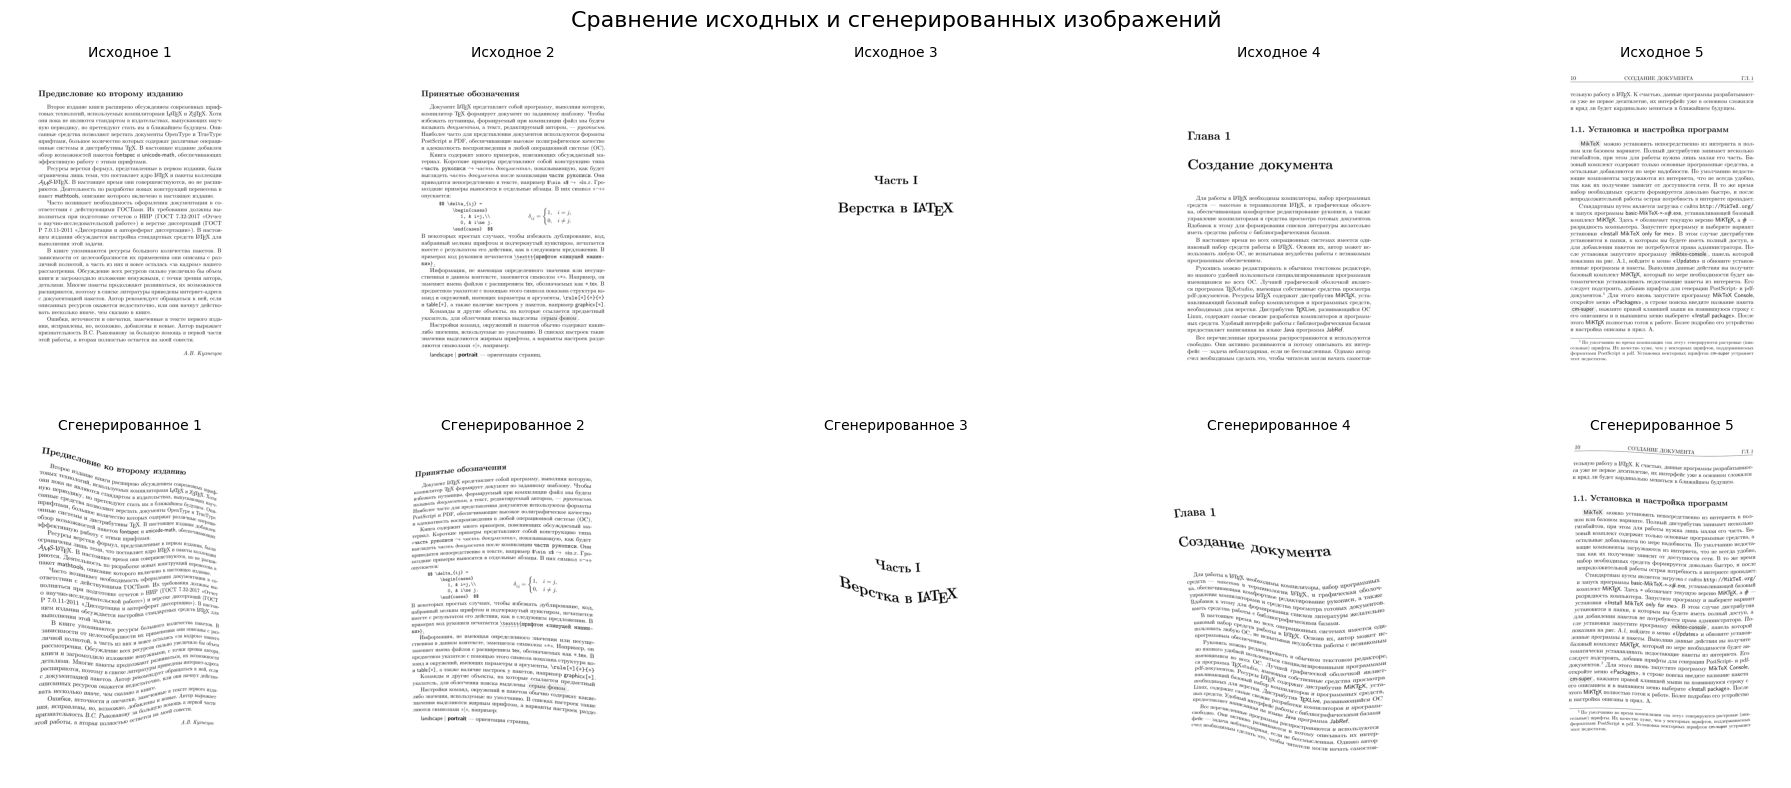

In [10]:
import os
import matplotlib.pyplot as plt
from PIL import Image
import numpy as np

# Пути к директориям
input_dir = 'data/raw/test/'
output_dir = 'data/generated/test/'

# Получаем списоки файлов (первые 5 изображений)
in_files = sorted([f for f in os.listdir(input_dir) 
                      if f.lower().endswith(('.png', '.jpg', '.jpeg'))])[:5]
out_files = sorted([f for f in os.listdir(output_dir) 
                      if f.lower().endswith(('.png', '.jpg', '.jpeg'))])[:5]

# Создаем фигуру 2×5 (2 строки, 5 столбцов)
fig, axes = plt.subplots(2, 5, figsize=(20, 8))
fig.suptitle('Сравнение исходных и сгенерированных изображений', fontsize=16, y=0.98)

for i, (in_img, out_img) in enumerate(zip(in_files, out_files)):
    # Загрузка исходного изображения
    input_path = os.path.join(input_dir, in_img)
    img_input = Image.open(input_path)
    
    # Загрузка сгенерированного изображения (если существует)
    output_path = os.path.join(output_dir, out_img)
    if os.path.exists(output_path):
        img_output = Image.open(output_path)
    else:
        # Если файл не найден, создаем черное изображение того же размера
        img_output = Image.new('RGB', img_input.size, color='black')
    
    # Отображение исходного изображения (верхний ряд) в ЧБ
    axes[0, i].imshow(np.array(img_input.convert('L')), cmap='gray')
    axes[0, i].set_title(f'Исходное {i+1}', fontsize=10)
    axes[0, i].axis('off')
    
    # Отображение сгенерированного изображения (нижний ряд) в ЧБ
    axes[1, i].imshow(np.array(img_output.convert('L')), cmap='gray')
    axes[1, i].set_title(f'Сгенерированное {i+1}', fontsize=10)
    axes[1, i].axis('off')

plt.tight_layout()
plt.show()

In [11]:
compose = Compose([
    RandomPerspectiveTransform(distortion_scale_range=(0.03, 0.07)),
    RandomSpineBend(strength_range=(5, 15)), 
    RandomWaveTransform(
        amp_x_range=(5,10),
        amp_y_range=(5,10),
        freq_range=(0.25, 1.25)
        ), 
    # RandomNoiseTransform(), # ПРИМЕНЯТЬ К TPS, А НЕ К ИЗОБРАЖЕНИЮ!
])

gen_dataset = TPSDatasetGenerator(
    input_dir='data/raw/v1/',
    output_dir='data/generated/v2/',
    pipeline=compose,
    grid_size=7
)

gen_dataset.generate()